### Part I: SORT raw images by channel

In [3]:
import os
import shutil
import glob

os.chdir('/Users/Alexander.Morano/Desktop/data/2024_12_19_GPCs_final_test/remnantplate/') 

# Set your prefix
prefix = 'rem_test'  # Replace this with your current prefix

# Step 1: List all TIF files matching the pattern
files = glob.glob(f"{prefix}_Plate_R_*.TIF")


# Step 2: Extract the 'd0', 'd1', or 'd2' from the filenames
prefixes = set()
for file in files:
    prematch = file.split('.')[0]  # Extract the relevant part like 'd0', 'd1', 'd2'
    match = prematch[-2:]
  
    if match.startswith('d') and match[1] in '012':
        prefixes.add(match)

# Step 3: For each unique prefix, create a directory and move the matching files
for prefix_match in sorted(prefixes):
    
    # Create directory if it doesn't exist
    os.makedirs(prefix_match, exist_ok=True)
    
    # Move matching files into the respective directory
    for file in files:
        if prefix_match in file:
            shutil.move(file, os.path.join(prefix_match, os.path.basename(file)))

print("Files have been organized.")


Files have been organized.


Part II: use CELLPOSE to identify GFP positive cells

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models, io, utils
from cellpose.io import imread
import os

modelpath = "/Users/Alexander.Morano/Desktop/cellpose_training/10x training/models/10X_NewCyto"
filepath = "/Users/Alexander.Morano/Desktop/data/2024_12_19_GPCs_final_test/remnantplate/d0/"

os.chdir(filepath)
files = os.listdir()
print(len(files))

model = models.CellposeModel(gpu = False, pretrained_model = modelpath)
channels = [[0,0]]

for i in files:
    image = io.imread(i)
    masks, flows, styles = model.eval(image, diameter = 60.0, channels = channels)
    io.save_rois(masks, i)

/opt/anaconda3/envs/cellpose/lib/python3.10/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename, map_l

48


<tifffile.TiffFile 'rem_test_Plate_…0_0_B06f00d0.TIF'> OME series is missing 2 frames. Missing data are zeroed
<tifffile.TiffFile 'rem_test_Plate_…0_0_C05f00d0.TIF'> OME series is missing 2 frames. Missing data are zeroed
<tifffile.TiffFile 'rem_test_Plate_…0_0_C04f00d0.TIF'> OME series is missing 2 frames. Missing data are zeroed
<tifffile.TiffFile 'rem_test_Plate_…0_0_C02f01d0.TIF'> OME series is missing 2 frames. Missing data are zeroed
<tifffile.TiffFile 'rem_test_Plate_…0_0_C03f01d0.TIF'> OME series is missing 2 frames. Missing data are zeroed
<tifffile.TiffFile 'rem_test_Plate_…0_0_B10f00d0.TIF'> OME series is missing 2 frames. Missing data are zeroed
<tifffile.TiffFile 'rem_test_Plate_…0_0_B11f00d0.TIF'> OME series is missing 2 frames. Missing data are zeroed
<tifffile.TiffFile 'rem_test_Plate_…0_0_C12f00d0.TIF'> OME series is missing 2 frames. Missing data are zeroed
<tifffile.TiffFile 'rem_test_Plate_…0_0_B01f01d0.TIF'> OME series is missing 2 frames. Missing data are zeroed
<

### Part III: Rename and reoganize resulting files.

In [15]:
import os

fileLocation = "/Users/Alexander.Morano/Desktop/data/2024_12_19_GPCs_final_test/titration/d2/"
fileList = os.listdir(fileLocation)
print(fileList)

for ii in fileList:
    newName = ii.replace('d2','d0_rois')
    if newName != ii:
        os.rename(fileLocation+ii,fileLocation+newName)
print(fileList)

['cr_titr_Plate_R_p00_0_E11f00d2.TIF', 'cr_titr_Plate_R_p00_0_E10f00d2.TIF', 'cr_titr_Plate_R_p00_0_F08f00d2.TIF', 'cr_titr_Plate_R_p00_0_F09f00d2.TIF', 'cr_titr_Plate_R_p00_0_F02f00d2.TIF', 'cr_titr_Plate_R_p00_0_F03f00d2.TIF', 'cr_titr_Plate_R_p00_0_E06f00d2.TIF', 'cr_titr_Plate_R_p00_0_E07f00d2.TIF', 'cr_titr_Plate_R_p00_0_F05f01d2.TIF', 'cr_titr_Plate_R_p00_0_F04f01d2.TIF', 'cr_titr_Plate_R_p00_0_F02f01d2.TIF', 'cr_titr_Plate_R_p00_0_F03f01d2.TIF', 'cr_titr_Plate_R_p00_0_E11f01d2.TIF', 'cr_titr_Plate_R_p00_0_E10f01d2.TIF', 'cr_titr_Plate_R_p00_0_F08f01d2.TIF', 'cr_titr_Plate_R_p00_0_F09f01d2.TIF', 'cr_titr_Plate_R_p00_0_E06f01d2.TIF', 'cr_titr_Plate_R_p00_0_E07f01d2.TIF', 'cr_titr_Plate_R_p00_0_F05f00d2.TIF', 'cr_titr_Plate_R_p00_0_F04f00d2.TIF', 'cr_titr_Plate_R_p00_0_E05f00d2.TIF', 'cr_titr_Plate_R_p00_0_E04f00d2.TIF', 'cr_titr_Plate_R_p00_0_F06f01d2.TIF', 'cr_titr_Plate_R_p00_0_F07f01d2.TIF', 'cr_titr_Plate_R_p00_0_E02f01d2.TIF', 'cr_titr_Plate_R_p00_0_E03f01d2.TIF', 'cr_titr_Pl

In [16]:
import glob
import shutil

source_files = "/Users/Alexander.Morano/Desktop/data/2024_12_19_GPCs_final_test/titration/d0/*.zip"
target_folder = "/Users/Alexander.Morano/Desktop/data/2024_12_19_GPCs_final_test/titration/d2/"

# retrieve file list
filelist = glob.glob(source_files)
for single_file in filelist:
     # move file with full paths as shutil.move() parameters
    shutil.move(single_file,target_folder) 

### Part IV: After Running FIJI macro on output of 2+3; sort by well.

In [9]:
import os
import shutil
import glob

os.chdir("/Users/Alexander.Morano/Desktop/data/2024_12_19_GPCs_final_test/remnantplate/results/") 

# Set your prefix
prefix = 'rem_test'  
# Replace this with your current prefix

# Step 1: List all files matching the pattern
files = glob.glob(f"{prefix}_Plate_R_p00_0_*")

# Step 2: Extract the well name from this title.
prefixes = set()
for file in files:
    prematch = file.split('_')[6]
    
    match = prematch[:3]
    print(match)
  
    if match[0] in ('ABCDEFGH') and match[2] in '0123456789':
        prefixes.add(match)

# Step 3: For each unique prefix, create a directory and move the matching files
for prefix_match in sorted(prefixes):
    
    # Create directory if it doesn't exist
    os.makedirs(prefix_match, exist_ok=True)
    
    # Move matching files into the respective directory
    for file in files:
        if prefix_match in file:
            shutil.move(file, os.path.join(prefix_match, os.path.basename(file)))

print("Files have been organized AGAIN.")


C06
B05
B02
C10
C01
B09
C09
B10
B01
C02
C05
B06
C08
C04
B07
B11
C12
C03
B12
B03
C11
C07
B04
B08
B09
C06
B05
B02
C01
C10
B01
B10
C02
C05
B06
C09
C04
B07
B11
C03
C12
C08
B08
B03
B12
C11
C07
B04
C08
C04
B07
B11
C03
C12
B03
B12
C11
C07
B04
B08
C06
B05
B02
C01
C10
B09
C09
B01
B10
C02
C05
B06
C04
B07
B11
C12
C03
C08
B08
B12
B03
C11
C07
B04
B09
C06
B05
B02
C10
C01
B10
B01
C02
C05
B06
C09
Files have been organized AGAIN.


Part V: Combine CSVs and produce output CSVs and graphs

/Users/Alexander.Morano/Desktop/data/2024_12_19_GPCs_final_test/remnantplate/results/B10/rem_test_Plate_R_p00_0_B10f00d0_rois_results.csv
/Users/Alexander.Morano/Desktop/data/2024_12_19_GPCs_final_test/remnantplate/results/B10/rem_test_Plate_R_p00_0_B10f01d0_rois_results.csv
/Users/Alexander.Morano/Desktop/data/2024_12_19_GPCs_final_test/remnantplate/results/B11/rem_test_Plate_R_p00_0_B11f01d0_rois_results.csv
/Users/Alexander.Morano/Desktop/data/2024_12_19_GPCs_final_test/remnantplate/results/B11/rem_test_Plate_R_p00_0_B11f00d0_rois_results.csv
/Users/Alexander.Morano/Desktop/data/2024_12_19_GPCs_final_test/remnantplate/results/C08/rem_test_Plate_R_p00_0_C08f01d0_rois_results.csv
/Users/Alexander.Morano/Desktop/data/2024_12_19_GPCs_final_test/remnantplate/results/C08/rem_test_Plate_R_p00_0_C08f00d0_rois_results.csv
/Users/Alexander.Morano/Desktop/data/2024_12_19_GPCs_final_test/remnantplate/results/C06/rem_test_Plate_R_p00_0_C06f01d0_rois_results.csv
/Users/Alexander.Morano/Desktop/da

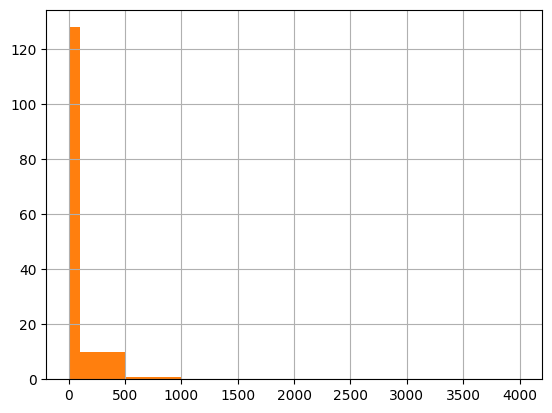

In [10]:
import os 
import pandas as pd
import matplotlib.pyplot as plt

root_path = "/Users/Alexander.Morano/Desktop/data/2024_12_19_GPCs_final_test/remnantplate/results/"

for root, sub, files in os.walk(root_path):
    filenames = [os.path.join(root, filename) for filename in files 
                 if filename.endswith('.csv')]
    
    flist = []
    plt.clf()
    for filename in filenames:
        print(os.path.join(root, filename))
        df = pd.read_csv(filename)
        flist.append(df)
        df_out = pd.concat(flist)
        df_out.loc['mean of cells'] = df_out.mean()
        df_out.to_csv(os.path.join(root, 'combined.csv'))
        fig = df_out['Mean'].hist(bins=[0, 100, 500, 1000, 2000, 3000, 4000])
        plt.savefig(os.path.join(root, 'fig'))
      

Part VI: add M images to the same subdirectories

In [11]:
import os
import shutil
import glob

os.chdir("/Users/Alexander.Morano/Desktop/data/2024_12_19_GPCs_final_test/remnantplate/results/") 

# Set your prefix
prefix = 'rem_test'  # Replace this with your current prefix

# Step 1: List all files matching the pattern
files = glob.glob(f"{prefix}_Plate_M_p00_0_*")

# Step 2: Extract the well name from this title.
prefixes = set()
for file in files:
    prematch = file.split('_')[6]
    
    match = prematch[:3]
    print(match)
  
    if match[0] in ('ABCDEFGH') and match[2] in '0123456789':
        prefixes.add(match)

# Step 3: For each unique prefix, create a directory and move the matching files
for prefix_match in sorted(prefixes):
    
    # Create directory if it doesn't exist
    os.makedirs(prefix_match, exist_ok=True)
    
    # Move matching files into the respective directory
    for file in files:
        if prefix_match in file:
            shutil.move(file, os.path.join(prefix_match, os.path.basename(file)))

print("Files have been organized AGAIN.")

C04
C05
B06
B07
B01
C09
C08
C12
B11
B10
C03
C02
B06
B07
C04
C05
C03
C02
B11
B10
C12
C09
C08
B01
B12
C01
B08
B09
B02
B03
C10
C11
B05
B04
C07
C06
C10
C11
B02
B03
B08
B09
C01
B12
C07
C06
B05
B04
Files have been organized AGAIN.


Part VII: Finally, you can generate a csv telling you which wells are positive and which are negative!

In [ ]:
import os 
import pandas as pd
import matplotlib.pyplot as plt

root_path = '/Users/Alexander.Morano/Desktop/data/2024_12_19_GPCs_final_test/humanplate/results_35diam/'

overall_quant = []

for root, sub, files in os.walk(root_path):

   filenames = [os.path.join(root, filename) for filename in files 
                 if filename.startswith('combined')]
   
   for filename in filenames:
        print(os.path.join(root, filename))
        x = os.path.join(root, filename)
        y = x.split('/')[-2]
        df = pd.read_csv(filename)
        mean_combined = df['Mean'].mean()
       
        if mean_combined > 100: #you can change this value depending on the intensity of the far red channel
            result = 'Positive'
        else:
            result = 'Negative'
                
        overall_quant.append({'Subfolder': y, 'Data': mean_combined, 'Results': result})
        

oqdf = pd.DataFrame(overall_quant)
sorted_oqdf = oqdf.sort_values(by='Subfolder')
print(sorted_oqdf)
sorted_oqdf.to_csv('/Users/Alexander.Morano/Desktop/data/2024_12_19_GPCs_final_test/humanplate/results_35diam/finalresultsalpha.csv')